In [1]:
import pandas as pd
import numpy as np
import re

from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset and combined them to get insights using 500 documents
data = pd.read_pickle('data/SemEval_data.pkl')

In [3]:
abs_sample = data['Abstract'][0]
data

,Doc_no,Abstract,Keywords
0,100,Poor oxidation behavior is the major barrier t...,"alloys,alloys with substantially improved oxid..."
1,101,A key part of this problem is that an inspecto...,"block,build a model of the smallest thicknesse..."
2,102,"In situ oxidation, experiments were carried ou...","3mm diameter discs,accelerating voltage of 30k..."
3,103,The study outlines a trial of transient respon...,"assessment of the corrosion condition,assess t..."
4,104,The results from two types of oxidation test a...,"adjusted to accommodate buoyancy effects,alumi..."
...,...,...,...
488,588,MicroCT has been applied to AM parts in variou...,"AM parts,average porosity,build direction,char..."
489,589,Aeroengine turbine disks often consist of para...,"Aeroengine turbine disks,decrease the mechanic..."
490,590,Although the presented model is developed and ...,"a-C:H layers,beryllium co-deposits,carbon,carb..."
491,591,Power and particle exhaust are crucial for the...,"D-T reactor,fusion power plant,fusion reactors..."


### Checking for duplicates in the 

In [4]:
print(f'Shape of the Dataset before removing duplicates : {data.shape}')
duplicate = data[data.duplicated('Doc_no')]
print(f'Duplicates found in the: {duplicate.shape}')

Shape of the Dataset before removing duplicates : (493, 3)
Duplicates found in the: (0, 3)


### Average length of the Abstracts before Pre-Processing

In [5]:
total_abstracts = []
for abstract in data['Abstract']:
    total_abstracts.append(len(abstract.split()))

In [6]:
avg_before_proc = (sum(total_abstracts)/len(total_abstracts))
print(f"Average length of abstracts : {avg_before_proc}")

Average length of abstracts : 168.92292089249491


### Text Pre-Processing

In [7]:
# Pre processing the Title text
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    stop_words = stopwords.words('english')
    stop_words = STOPWORDS.union(set(stop_words))
    
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = " ".join(filtered_sentence)
    return filtered_sentence

def lemmatize(sentence):
    lemmatizer = WordNetLemmatizer()
    lem_sentence = ""
    for word in word_tokenize(sentence):
        word = lemmatizer.lemmatize(word)
        lem_sentence += word
        lem_sentence += " "
    lem_sentence = lem_sentence.strip()
    return lem_sentence

In [8]:
data['Abstract'] = data['Abstract'].str.lower()
data['Abstract'] = data['Abstract'].apply(cleanHtml)
data['Abstract'] = data['Abstract'].apply(cleanPunc)
data['Abstract'] = data['Abstract'].apply(keepAlpha)
data['Abstract'] = data['Abstract'].apply(removeStopWords)
data['Abstract'] = data['Abstract'].apply(lemmatize)

data['Keywords'] = data['Keywords'].str.lower()

data.head()

,Doc_no,Abstract,Keywords
0,100,poor oxidation behavior major barrier increase...,"alloys,alloys with substantially improved oxid..."
1,101,key problem inspector access data small inspec...,"block,build a model of the smallest thicknesse..."
2,102,situ oxidation experiment carried mm diameter ...,"3mm diameter discs,accelerating voltage of 30k..."
3,103,study outline trial transient response analysi...,"assessment of the corrosion condition,assess t..."
4,104,result type oxidation test combined study tabl...,"adjusted to accommodate buoyancy effects,alumi..."


### Comparing a row from the abstract column before and after text-processing

In [9]:
print(f'Length before pre-processing : {len(abs_sample.split())}\n')
print(abs_sample)

Length before pre-processing : 138

Poor oxidation behavior is the major barrier to the increased use of Ti-based alloys in high-temperature structural applications. The demand to increase the service temperature of these alloys beyond 550°C (the typical temperature limit) requires careful study to understand the role that composition has on the oxidation behavior of Ti-based alloys [1–3]. The attempt to overcome this limitation in Ti-based alloys has led to the production of alloys with substantially improved oxidation resistance such as β-21S and also development of coatings and pre-oxidation techniques [1,4–6]. While it is tempting to extrapolate the oxidation behavior (e.g. oxidation rate law, depth of oxygen ingress and scale thickness) observed for a limited number of compositions under a certain oxidation condition to a broader compositional range, there are numerous examples in the literature where deviations from the expected relations are observed [7,8]. 


In [10]:
procs_abs_sample = data['Abstract'][0]
print(f'Length after pre-processing : {len(procs_abs_sample.split())}\n')
print(procs_abs_sample)

Length after pre-processing : 83

poor oxidation behavior major barrier increased use ti based alloy high temperature structural application demand increase service temperature alloy c typical temperature limit requires careful study understand role composition oxidation behavior ti based alloy attempt overcome limitation ti based alloy led production alloy substantially improved oxidation resistance development coating pre oxidation technique tempting extrapolate oxidation behavior e g oxidation rate law depth oxygen ingres scale thickness observed limited number composition certain oxidation condition broader compositional range numerous example literature deviation expected relation observed


### Average length of the abstracts after pre-processing

In [11]:
total_abstracts = []
for abstract in data['Abstract']:
    total_abstracts.append(len(abstract.split()))

In [12]:
avg_after_proc = (sum(total_abstracts)/len(total_abstracts))
print(f"Average length of abstracts : {avg_after_proc}")

Average length of abstracts : 94.57200811359026


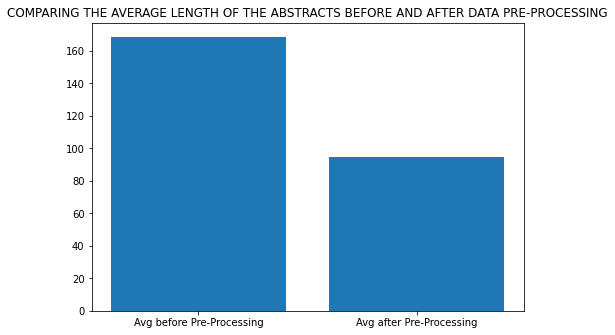

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
desc = ['Avg before Pre-Processing', 'Avg after Pre-Processing']
average_score = [avg_before_proc, avg_after_proc]
ax.bar(desc,average_score)
plt.title('COMPARING THE AVERAGE LENGTH OF THE ABSTRACTS BEFORE AND AFTER DATA PRE-PROCESSING')
plt.show()

In [14]:
data.head()

,Doc_no,Abstract,Keywords
0,100,poor oxidation behavior major barrier increase...,"alloys,alloys with substantially improved oxid..."
1,101,key problem inspector access data small inspec...,"block,build a model of the smallest thicknesse..."
2,102,situ oxidation experiment carried mm diameter ...,"3mm diameter discs,accelerating voltage of 30k..."
3,103,study outline trial transient response analysi...,"assessment of the corrosion condition,assess t..."
4,104,result type oxidation test combined study tabl...,"adjusted to accommodate buoyancy effects,alumi..."


In [15]:
pd.to_pickle(data, 'Data/Processed_SemEval.pkl')